PROYECTO INDIVIDUAL 2°   DATA ANALYTICS

1. Importación de librerias

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

2. Importación de base de datos

In [121]:
# Carga de archivo hechos_homicidios
df_hechos_homicidios = pd.read_csv("hechos_homicidios.csv", delimiter=';', quotechar='"', skiprows=[38])
# Carga de archivo victima_homicidios
df_victima_homicidios = pd.read_csv("victima_homicidios.csv", sep=';')
# Carga de archivo hechos_lesiones
df_hechos_lesiones = pd.read_csv("hechos_lesiones.csv", sep=';')
# Carga de archivo hechos_lesiones
df_victima_lesiones = pd.read_csv("victima_lesiones.csv", sep=';')

C:\Users\Angela\AppData\Local\Temp\ipykernel_12864\3703368630.py:8: DtypeWarning: Columns (0,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_victima_lesiones = pd.read_csv("victima_lesiones.csv", sep=';')


Se realizaran 4 importaciones de archivos csv los cuales se llaman hechos_homicidios, victima_homicidios, hechos_lesiones y victima_lesiones, el analisis se realizara por cada archivo

3. Vista general y transformación  de los datos

3.1 df_hechos_homicidios

In [98]:
# Visulización del df_hechos_homicidios
df_hechos_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/01/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,2/01/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,3/01/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,10/01/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1.0,21/01/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Se identifican las dimencciones del df df_hechos_homicidios
df_hechos_homicidios.shape

(10492, 21)

In [26]:
# Se visualizan los tipos de datos por columna y sus nulos
df_hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     695 non-null    object 
 1   N_VICTIMAS             695 non-null    float64
 2   FECHA                  695 non-null    object 
 3   AAAA                   695 non-null    float64
 4   MM                     695 non-null    float64
 5   DD                     695 non-null    float64
 6   HORA                   695 non-null    object 
 7   HH                     695 non-null    object 
 8   LUGAR_DEL_HECHO        695 non-null    object 
 9   TIPO_DE_CALLE          695 non-null    object 
 10  Calle                  694 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  524 non-null    object 
 13  Dirección Normalizada  687 non-null    object 
 14  COMUNA                 695 non-null    float64
 15  XY

Como podemos evidenciar el df_hechos_homicidios tiene una dimesión de 10492 * 21 columnas, pero hasta la fila 695 tiene datos el resto de la data es NaN, por ende se hace la elimanción de esas filas

In [27]:
#Eliminación  de filas NaN
df_hechos_homicidios = df_hechos_homicidios.iloc[:695] 

Se verifican si hay valores duplicados

In [28]:
# Buscamos filas con valores duplicados
duplicados = df_hechos_homicidios[df_hechos_homicidios.duplicated()] 
duplicados

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


Se realiza eliminación de las columnas XY (CABA) ya que se realizara la ubicación de los siniestros por medio de las columnas pos x y pos y tambien se eliminara la columna altura ya que tiene menos del 20% de la data completa y por medio de otras columas se puede identificar la direción del siniestro

In [29]:
#Se elimina las columnas ya mecionadas
df_hechos_homicidios.drop(columns=['Altura', 'XY (CABA)','LUGAR_DEL_HECHO', 'Calle','Cruce','Dirección Normalizada',], inplace=True)

C:\Users\Angela\AppData\Local\Temp\ipykernel_12864\1044008113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos_homicidios.drop(columns=['Altura', 'XY (CABA)','LUGAR_DEL_HECHO', 'Calle','Cruce','Dirección Normalizada',], inplace=True)


In [30]:
# Control de la data
df_hechos_homicidios.sample(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
264,2017-0151,1.0,4/12/2017,2017.0,12.0,4.0,2:15:00,2,CALLE,4.0,-58.37460912,-34.65559133,PEATON-PASAJEROS,PEATON,PASAJEROS
347,2018-0074,1.0,14/07/2018,2018.0,7.0,14.0,6:04:00,6,AVENIDA,7.0,-58.46941984,-34.63376545,AUTO-CARGAS,AUTO,CARGAS
651,2021-0054,1.0,22/06/2021,2021.0,6.0,22.0,14:44:00,14,CALLE,4.0,-58.42759813,-34.65463857,MOTO-CARGAS,MOTO,CARGAS


Se hace un cambio de nombre para mejor manejo de las columnas

In [31]:
# Se hace rename a los nombres de las columnas
f_hechos_homicidios.rename(columns={'pos x': 'Longitud', 'pos y': 'Latitud', 'AAAA': 'Año', 'MM': 'Mes', 'DD': 'Dia'}, inplace=True)

C:\Users\Angela\AppData\Local\Temp\ipykernel_12864\660358138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos_homicidios.rename(columns={'pos x': 'Longitud', 'pos y': 'Latitud', 'AAAA': 'Año', 'MM': 'Mes', 'DD': 'Dia'}, inplace=True)


Se verifica los datos de ubicación

In [32]:
#se llaman a las columnas latitud y longitud para ver sus datos
df_hechos_homicidios[['Latitud', 'Longitud']].head()

,Latitud,Longitud
0,-34.68757022,-58.47533969
1,-34.66977709,-58.50877521
2,-34.63189362,-58.39040293
3,-34.68092974,-58.46503904
4,-34.62246630,-58.38718297


Se pasan todos los titulos de las columnas a minuscula para mejor manejo de codigo y se hace control de la data

In [33]:
#Se pasa a minuscula los titulos
df_hechos_homicidios.columns = df_hechos_homicidios.columns.str.lower()

In [34]:
#Control de la data
df_hechos_homicidios.head(3)

,id,n_victimas,fecha,año,mes,dia,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1.0,1/01/2016,2016.0,1.0,1.0,4:00:00,4,AVENIDA,8.0,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,2/01/2016,2016.0,1.0,2.0,1:15:00,1,GRAL PAZ,9.0,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,3/01/2016,2016.0,1.0,3.0,7:00:00,7,AVENIDA,1.0,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Se realiza cambio de tipo de dato a entero de las siguientes columnas

In [35]:
columnas_numericas = ["n_victimas", "año", "mes", "dia", "comuna"]
df_hechos_homicidios[columnas_numericas] = df_hechos_homicidios[columnas_numericas].astype(float).astype(pd.Int32Dtype())

C:\Users\Angela\AppData\Local\Temp\ipykernel_12864\2008048067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hechos_homicidios[columnas_numericas] = df_hechos_homicidios[columnas_numericas].astype(float).astype(pd.Int32Dtype())


Se realiza un resumen de analisis estadistico del dataframe, proporcionando información util sobre las estadisticas descriptivas de las columnas numericas.

In [36]:
#Descripción de variables numericas, falta price
df_hechos_homicidios.describe()

,n_victimas,año,mes,dia,comuna
count,695.0,695.0,695.0,695.0,695.0
mean,1.030216,2018.191367,6.696403,15.930935,7.430216
std,0.179519,1.682915,3.572417,8.64449,4.388281
min,1.0,2016.0,1.0,1.0,0.0
25%,1.0,2017.0,4.0,9.0,4.0
50%,1.0,2018.0,7.0,16.0,8.0
75%,1.0,2020.0,10.0,23.0,11.0
max,3.0,2021.0,12.0,31.0,15.0


Se genera un resumen estadistico de las columnas no numéricas o datos categoricos, tenemos que en el top de tipo de calle se encuentra las avenidas, y las motos son la mayor cantidad de victimas y los mas acusados son los autos.

In [102]:
# Descripcion de las columnas no numericas 
df_hechos_homicidios.describe(include=['O'])

,id,fecha,hora,hh,tipo_de_calle,longitud,latitud,participantes,victima,acusado
count,695,695,695,695,695,695,695,695,695,695
unique,695,598,346,25,4,605,605,41,10,10
top,2016-0001,17/02/2018,12:30:00,7,AVENIDA,.,.,PEATON-PASAJEROS,MOTO,AUTO
freq,1,3,10,41,428,12,12,105,294,204


Gráficas

Grafica de outliers, podemos evidenciar que no encontramos ninguno es nuestras columnas númericas

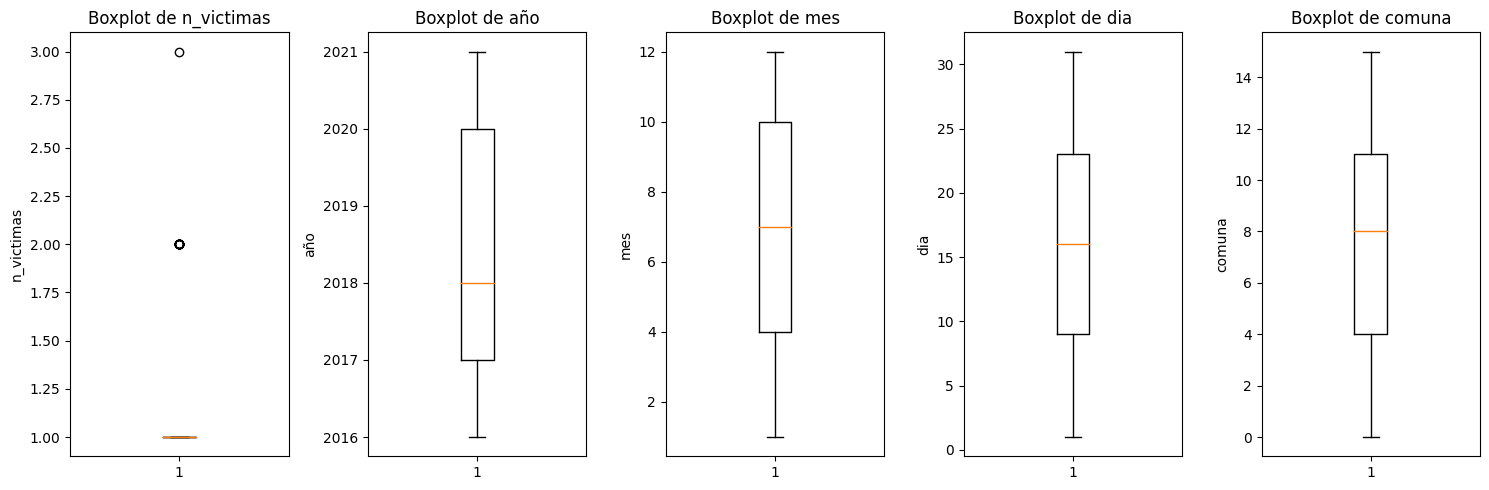

In [39]:
#  columnas de interés
columnas_seleccionadas = ['n_victimas', 'año', 'mes', 'dia', 'comuna']

# subplots para los boxplots
fig, axs = plt.subplots(1, len(columnas_seleccionadas), figsize=(15, 5))

# Graficar boxplots para cada columna seleccionada
for i, columna in enumerate(columnas_seleccionadas):
    axs[i].boxplot(df_hechos_homicidios[columna])
    axs[i].set_title(f'Boxplot de {columna}')
    axs[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

Gráfica de barras en la que se puede visualizar los años 2016 a 2021 y el número de víctimas en cada año, teniendo el año 2018 con más accidentes y el menor con en el 2020, respecto a la baja de año 2020 se puede atribuir a la pandemia y a las restricciones del momento

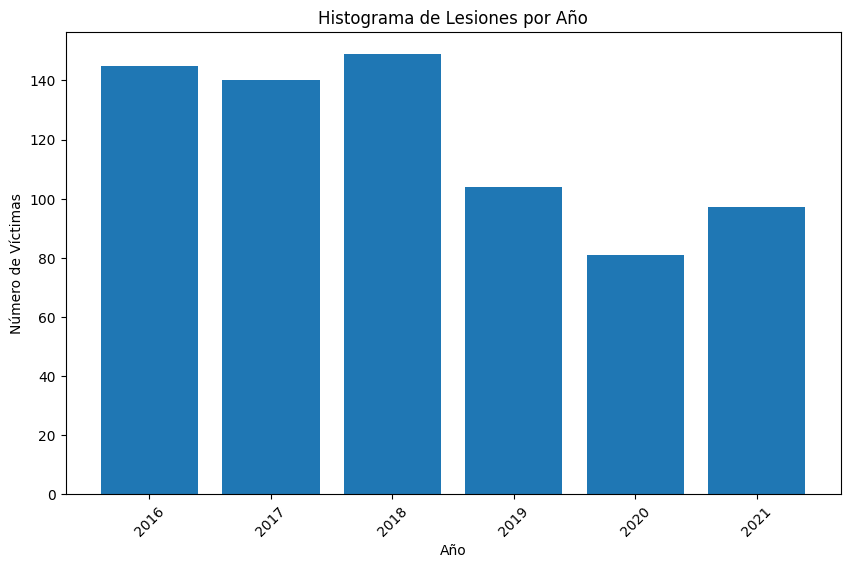

In [103]:
# Se hace un groupby 
data_por_anio = df_hechos_homicidios.groupby('año')['n_victimas'].sum()

# Luego, crea el histograma
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
plt.bar(data_por_anio.index.astype(int), data_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Histograma de Lesiones por Año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

Gráfica de barras para visualizar el tipo de calle en la que se presenta los siniestros, siendo la Avenida en la que más se presentan accidentes

c:\Users\Angela\Desktop\Ensayo\mi_entorno_virtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angela\Desktop\Ensayo\mi_entorno_virtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angela\Desktop\Ensayo\mi_entorno_virtual\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


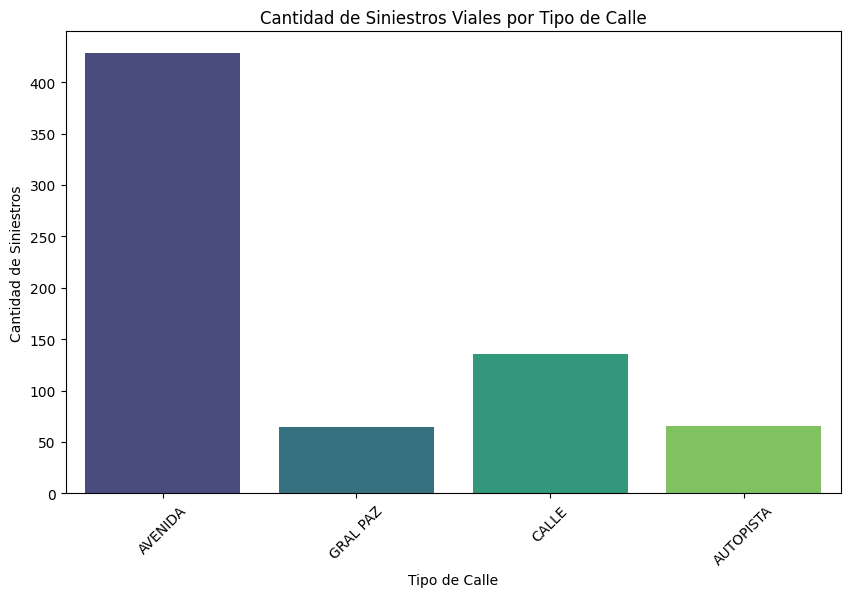

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_hechos_homicidios, x='tipo_de_calle', palette='viridis')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.title('Cantidad de Siniestros Viales por Tipo de Calle')
plt.xticks(rotation=45)
plt.show()

Se guarda el dataframe para trabajar en el dashboard

In [105]:
# Guarda el DataFrame en un archivo CSV
df_hechos_homicidios.to_csv('homicidios.csv', index=False)

3.2 victima_homicidios

Se visualiza en dataframe victima_homicidios, su dimesión e información

In [122]:
# Visulización del df_victima_homicidios
df_victima_homicidios

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/01/2016,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19,1/01/2016
1,2016-0002,2/01/2016,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70,2/01/2016
2,2016-0003,3/01/2016,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30,3/01/2016
3,2016-0004,10/01/2016,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,21/01/2016,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29,1/02/2016
...,...,...,...,...,...,...,...,...,...,...
715,2021-0095,30/12/2021,2021.0,12.0,30.0,CONDUCTOR,MOTO,MASCULINO,27,2/01/2022
716,2021-0096,15/12/2021,2021.0,12.0,15.0,CONDUCTOR,AUTO,MASCULINO,60,20/12/2021
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Se identifican las dimencciones del df df_hechos_homicidios
df_victima_homicidios.shape

(720, 10)

In [124]:
#Vista general de la data
df_victima_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 56.4+ KB


Se hace verificación de valores duplicados y eliminación de las ultimas filas con valores NaN

In [125]:
#Eliminación  de filas NaN
df_victima_homicidios = df_victima_homicidios.iloc[:717] 

In [126]:
# Buscamos filas con valores duplicados
duplicados = df_victima_homicidios[df_victima_homicidios.duplicated()] 
duplicados

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


Renombrando los valores de las columnas para mejor manejo de la data

In [127]:
# se utiliza .rename para hacer cambio de nombres en columnas
df_victima_homicidios.rename(columns={'AAAA': 'Año', 'MM': 'Mes', 'DD': 'Dia'}, inplace=True)

C:\Users\Angela\AppData\Local\Temp\ipykernel_12864\2895182988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victima_homicidios.rename(columns={'AAAA': 'Año', 'MM': 'Mes', 'DD': 'Dia'}, inplace=True)


Se pasa los valores de la columna a minuscula

In [128]:
# Pasando a minúscula para mejor manejo del código
df_victima_homicidios.columns = df_victima_homicidios.columns.str.lower()

In [129]:
# Control de la data
df_victima_homicidios

,id_hecho,fecha,año,mes,dia,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1/01/2016,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19,1/01/2016
1,2016-0002,2/01/2016,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70,2/01/2016
2,2016-0003,3/01/2016,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30,3/01/2016
3,2016-0004,10/01/2016,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,21/01/2016,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29,1/02/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021.0,12.0,12.0,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,13/12/2021,2021.0,12.0,13.0,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,18/12/2021
714,2021-0094,20/12/2021,2021.0,12.0,20.0,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,20/12/2021
715,2021-0095,30/12/2021,2021.0,12.0,30.0,CONDUCTOR,MOTO,MASCULINO,27,2/01/2022


Se realiza un resumen de analisis estadistico del dataframe, proporcionando información util sobre las estadisticas descriptivas de las columnas numericas.

In [130]:
#Descripción de variables numericas, falta price
df_victima_homicidios.describe()

,año,mes,dia
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


Se genera un resumen estadistico de las columnas no numéricas o datos categoricos, tenemos que en el top de rol se encuentra los conductores, y las motos son la mayor cantidad de victimas.

In [131]:
# Descripcion de las columnas no numericas 
df_victima_homicidios.describe(include=['O'])

,id_hecho,fecha,rol,victima,sexo,edad,fecha_fallecimiento
count,717,717,717,717,717,717,717
unique,696,598,5,8,3,86,563
top,2017-0035,26/02/2017,CONDUCTOR,MOTO,MASCULINO,SD,SD
freq,3,3,330,303,545,53,68


Gráficas

Grafica de distribución de edades de las victimas, podemos evidenciar que entre los 20 y 40 son las edades con siniestros

C:\Users\Angela\AppData\Local\Temp\ipykernel_12864\989072880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victima_homicidios['edad'] = pd.to_numeric(df_victima_homicidios['edad'], errors='coerce')


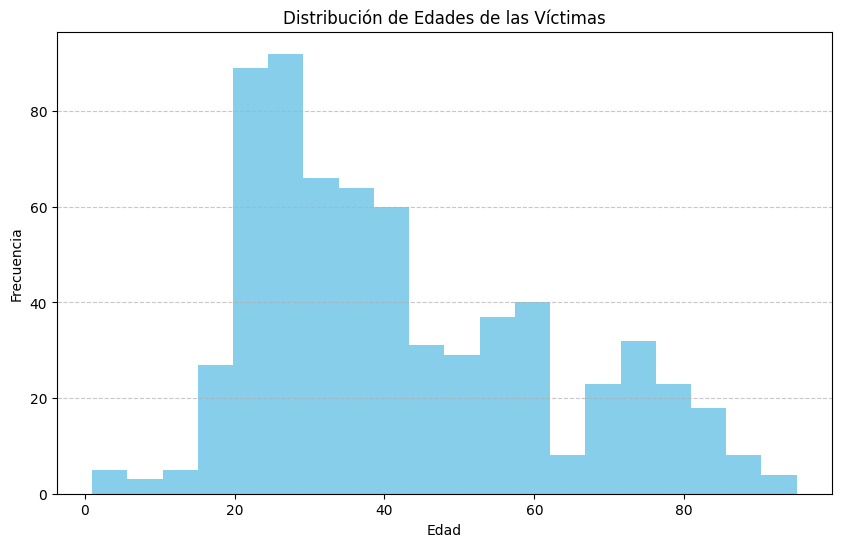

In [132]:
# Asegúrate de que la columna 'edad' esté en formato numérico
df_victima_homicidios['edad'] = pd.to_numeric(df_victima_homicidios['edad'], errors='coerce')

# Crea un histograma de edades
plt.figure(figsize=(10, 6))
plt.hist(df_victima_homicidios['edad'].dropna(), bins=20, color='skyblue')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se grafica los roles de las victimas, siendo el conductor con un 46% el que tiene mas porcentaje

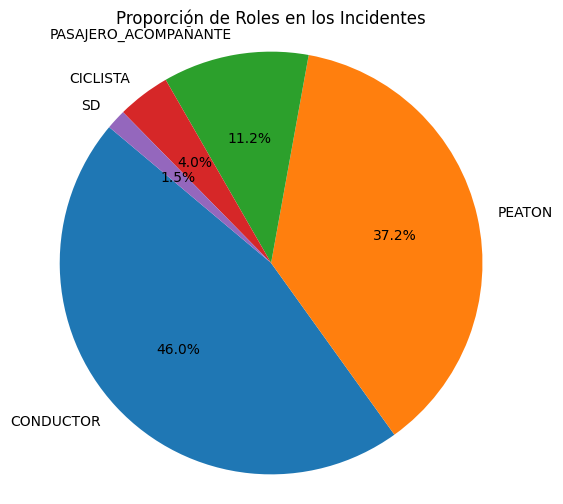

In [133]:
# Cuenta la cantidad de cada rol
rol_counts = df_victima_homicidios['rol'].value_counts()

# Prepara los datos para el gráfico de pastel
labels = rol_counts.index
sizes = rol_counts.values

# Crea el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Roles en los Incidentes')
plt.axis('equal') 

plt.show()

Se guarda el dataframe para trabajar en el dashboard

In [136]:
# Guarda el DataFrame en un archivo CSV
df_victima_homicidios.to_csv('homicidios_victima.csv', index=False)

3.3 hechos_lesiones

Se visualiza en dataframe df_hechos_lesiones, su dimesión e información

In [134]:
# Visulización del df_hechos_lesiones
df_hechos_lesiones

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,1/01/2019,9:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,1/01/2019,1:55,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,1/01/2019,2:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,1/01/2019,2:30,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,1/01/2019,4:30,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,31/12/2021,19:30,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,31/12/2021,19:40,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,31/12/2021,20:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,31/12/2021,22:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [135]:
# Se identifican las dimencciones del df df_hechos_homicidios
df_hechos_lesiones.shape

(23785, 27)

In [136]:
#Vista general de la data
df_hechos_lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

Como se visualiza en las siguientes columnas 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista' todas son tipos de transporte las cuales se pueden manipular en una misma columna que se llamara 'tipo_transporte' y se eliminaran las otras.

In [137]:
# Se crea la nueva columna 'tipo_transporte' 
tipos_transporte = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']
df_hechos_lesiones['tipo_transporte'] = df_hechos_lesiones[tipos_transporte].apply(lambda row: ', '.join([tipo for tipo, valor in zip(tipos_transporte, row) if valor == 'x']), axis=1)

# Reemplaza valores 'SD' en la nueva columna con cadena vacía
df_hechos_lesiones['tipo_transporte'] = df_hechos_lesiones['tipo_transporte'].str.replace('SD', '')

# Lista de nombres a la columna que se debe eliminar
columnas_a_eliminar = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']

# Se elimina las columnas del DataFrame
df_hechos_lesiones = df_hechos_lesiones.drop(columnas_a_eliminar, axis=1)

In [138]:
#se hace control de la data
df_hechos_lesiones.sample(3)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,gravedad,tipo_transporte
777,LC-2019-0069851,1,2019,2,2,2/02/2019,10:47,10,SD,2,...,NaN,NaN,Point (105703.92539704195223749 104136.3186425...,-58.401124,-34.591968,SD,SD,SD-SD,SD,moto
4212,LC-2019-0335230,1,2019,5,22,22/05/2019,12:00,12,SD,8,...,NaN,NaN,Point (102168.26947901514358819 96361.78888914...,-58.439645,-34.662064,SD,SD,SD-SD,SD,ciclista
21590,LC-2021-0475956,1,2021,9,24,24/09/2021,19:45,19,"LIMA y GARAY, JUAN DE AV.",1,...,0.0,"GARAY, JUAN DE AV.",Point (107433.796477131 100255.683192109),-58.382233829418,-34.626938657191,PEATON,TRANSPORTE PUBLICO,PEATON-TRANSPORTE PUBLICO,SD,transporte_publico


Segun el diccionario el  transporte publico, lo determinan como pasajeros "en la hoja clas" y para hacer la normalización  se hace el cambio y poder manipular mejor la data

In [139]:
# Se convierte la columna 'tipo_transporte' a mayúsculas
df_hechos_lesiones['tipo_transporte'] = df_hechos_lesiones['tipo_transporte'].str.upper()

# Se remplaza 'transporte_publico' por 'PASAJEROS' en la columna 'tipo_transporte'
df_hechos_lesiones['tipo_transporte'] = df_hechos_lesiones['tipo_transporte'].str.replace('TRANSPORTE_PUBLICO', 'PASAJEROS')

# Se remplaza comas por guiones 
df_hechos_lesiones['tipo_transporte'] = df_hechos_lesiones['tipo_transporte'].str.replace(', ', '-')

ahora lo mismo para la columna participantes ya que se piensa hacer un enlace entre las dos, entonces los datos deben coincidir

In [140]:
# Función para realizar el reemplazo
def reemplazar_transportes(texto):
    #buscar "TRANSPORTE PUBLICO" 
    texto = re.sub(r'\bTRANSPORTE\s+PUBLICO\b', 'PASAJEROS', texto, flags=re.IGNORECASE)
    # Reemplazar comas por guiones 
    texto = texto.replace(', ', '-')
    return texto

# Aplicación de la función 
df_hechos_lesiones['participantes'] = df_hechos_lesiones['participantes'].apply(reemplazar_transportes)

In [142]:
# Control data aleatorio
df_hechos_lesiones.sample(3)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,gravedad,tipo_transporte
21852,LC-2021-0498232,2,2021,10,7,7/10/2021,0:40,0,CORRIENTES AV. y CALLAO AV.,3,...,0.0,CALLAO AV.,Point (106513.41423248 102752.753544018),-58.392289656654,-34.604435273925,SD,SD,SD-SD,SD,
5369,LC-2019-0404927,1,2019,6,30,30/06/2019,20:30,20,SD,7,...,NaN,NaN,Point (100002.18354608969821129 100614.2427338...,-58.463276,-34.623733,MOTO,SD,MOTO-SD,SD,MOTO
16821,LC-2021-0546994,1,2021,11,2,2/11/2021,20:45,20,GASCON y CORDOBA AV.,14,...,0.0,CORDOBA AV.,Point (103662.913639291 103496.492060194),-58.423369304250,-34.597744873389,CICLISTA,AUTO,CICLISTA-AUTO,SD,AUTO-CICLISTA


ya que se evidencia que son los mismos datos pero entre ellas se pueden complementar cuando hay datos faltantes de una columna o de la otra, se realiza una iterpolacion de datos

In [143]:
# Función para realizar la transformacion
def combinar_participantes_tipo_transporte(row):
    participantes = row['participantes'].split('-')
    tipo_transporte = row['tipo_transporte'].split('-')
    
    # Eliminar 'SD' de ambas listas
    participantes = [p for p in participantes if p != 'SD']
    tipo_transporte = [t for t in tipo_transporte if t != 'SD']
    
    # Combinar listas y eliminar duplicados
    combinado = list(set(participantes + tipo_transporte))
    
    # Si no hay valores en ninguna de las columnas, dejar 'SD-SD'
    if not combinado:
        return 'SD-SD'
    
    # Se remplaza espacios en blanco por guiones
    combinado = [c.replace(' ', '-') for c in combinado]
    
    # Union de los valores de la lista combinada con guiones
    resultado = '-'.join(combinado)
    
    return resultado

# Se aplica la función a las filas 
df_hechos_lesiones['combinado'] = df_hechos_lesiones.apply(combinar_participantes_tipo_transporte, axis=1)

# Se elimina columnas originales 
df = df_hechos_lesiones.drop(['participantes', 'tipo_transporte'], axis=1)

# Se renombra
df = df.rename(columns={'combinado': 'nueva_columna'})

# Se remplza las celdas vacías por 'SD-SD'
df['nueva_columna'] = df['nueva_columna'].replace('', 'SD-SD')

# S eliminalos  guiones "-" al principio de cada celda
df['nueva_columna'] = df['nueva_columna'].str.lstrip('-')

se elimina las columnas participantes y tipo de trasnporte y se renombra la columna nueva columna participantes ya que esta completa

In [144]:
# Renombrar la columna 'nueva_columna' a 'participantes'
df = df.rename(columns={'nueva_columna': 'participantes'})

Se hace elimanación de las columnas que no se van a utilizar en el analisis

In [146]:
columns_to_drop = ['direccion_normalizada', 'otra_direccion', 'calle', 'altura', 'cruce', 'geocodificacion_CABA']
df = df.drop(columns=columns_to_drop)

In [147]:
#Se hace control de la data
df.sample(3)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,longitud,latutid,victima,acusado,gravedad,participantes
12477,LC-2020-0178255,1,2020,3,24,24/03/2020,05:15:00 a.m.,5,11,GRAL PAZ,-58.527329719274,-34.608894411530,MOTO,OBJETO FIJO,SD,MOTO-OBJETO-FIJO
17732,LC-2021-0081374,1,2021,2,23,23/02/2021,13:50,13,5,CALLE,-58.425563226182,-34.626823770569,PEATON,MOTO,SD,MOTO-PEATON
10321,LC-2020-0235954,1,2020,5,11,11/05/2020,11:30:00 p.m.,23,3,CALLE,-58.396473120354,-34.607152253349,CICLISTA,MOTO,SD,CICLISTA-MOTO


Se realiza un resumen de analisis estadistico del dataframe, proporcionando información util sobre las estadisticas descriptivas de las columnas numericas.

In [148]:
#Descripción de variables numericas, falta price
df.describe()

,n_victimas,aaaa,mm,dd
count,23785.000000,23785.000000,23785.000000,23785.000000
mean,1.160563,2019.901324,6.597561,15.616355
std,0.551571,0.859432,3.476955,8.700047
min,0.000000,2019.000000,1.000000,1.000000
25%,1.000000,2019.000000,3.000000,8.000000
50%,1.000000,2020.000000,7.000000,16.000000
75%,1.000000,2021.000000,10.000000,23.000000
max,16.000000,2021.000000,12.000000,31.000000


Se genera un resumen estadistico de las columnas no numéricas o datos categoricos

In [149]:
# Descripcion de las columnas no numericas 
df.describe(include=['O'])

,id,fecha,hora,franja_hora,comuna,tipo_calle,longitud,latutid,victima,acusado,gravedad,participantes
count,23785,23785,23785,23780,23616,23785,23523,23523,23785,23785,23785,23785
unique,23785,1097,2000,25,17,5,13810,13757,14,14,5,119
top,LC-2019-0000179,17/12/2021,0:00,17,1,SD,SD,SD,SD,SD,SD,SD-SD
freq,1,55,359,1734,2526,11045,1209,1209,10733,15288,23056,6402


Arreglo de normalización de datos

In [150]:
# Se hace un .rename para las siguientes columnas, para mejor manejo del código
df.rename(columns={'aaaa': 'año', 'mm': 'mes', 'dd': 'dia'}, inplace=True)

In [18]:
# Se pasa todos los calores a mayusculas
df['gravedad'] = df['gravedad'].str.upper()

In [19]:
#Se sacan todos los unicos 
print(df['gravedad'].unique()) 

['SD' 'GRAVE' 'FATAL']


Gráfica

Se grafica la distribución del tiempo en horas, respecto a los accidentes que ocurren, visualizando las horas de la madrugada y la mañana con mas indices.

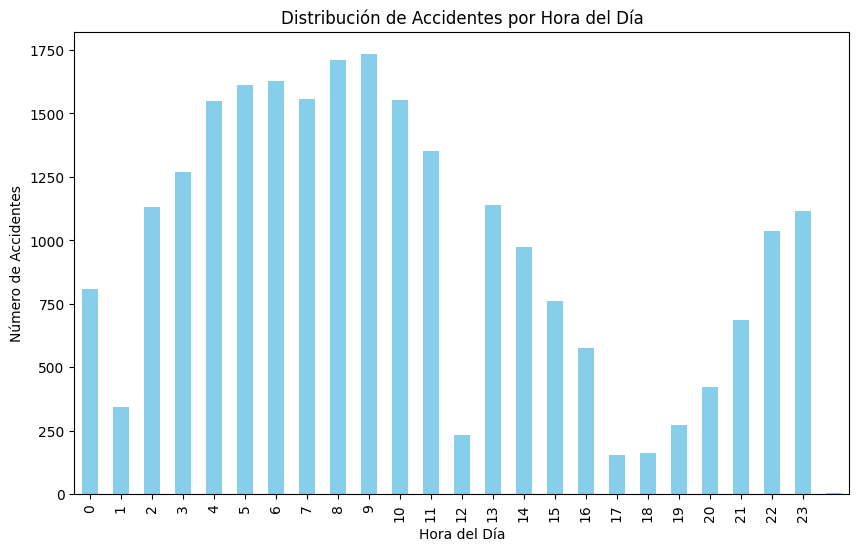

In [151]:
# Se un histograma de las horas de los accidentes
plt.figure(figsize=(10, 6))  
df['franja_hora'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')

# Orden cronológico en el eje x
plt.xticks(range(24), range(24))
plt.show()

Se guarda el dataframe para trabajar en el dashboard

In [489]:
# Guarda el DataFrame en un archivo CSV
df.to_csv('lesiones.csv', index=False)

3.4 Victima_lesiones

Se visualiza en dataframe df_victima_lesiones, su dimesión e información

In [152]:
# Visulización del df_victima_lesiones
df_victima_lesiones

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019.0,1.0,1.0,1/01/2019,sd,Varon,57,SD
1,LC-2019-0000063,2019.0,1.0,1.0,1/01/2019,sd,SD,SD,SD
2,LC-2019-0000079,2019.0,1.0,1.0,1/01/2019,sd,Varon,SD,SD
3,LC-2019-0000082,2019.0,1.0,1.0,1/01/2019,sd,Varon,45,SD
4,LC-2019-0000082,2019.0,1.0,1.0,1/01/2019,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
66346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
#Se verifica el tamaño de la base de datos
df_victima_lesiones.shape

(66351, 9)

In [154]:
#Vista general de la data
df_victima_lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66351 entries, 0 to 66350
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID hecho          27605 non-null  object 
 1   AAA               27605 non-null  float64
 2   MM                27605 non-null  float64
 3   DD                27605 non-null  float64
 4   FECHA             27605 non-null  object 
 5   VEHICULO_VICTIMA  27605 non-null  object 
 6   SEXO              27605 non-null  object 
 7   EDAD_VICTIMA      27605 non-null  object 
 8   GRAVEDAD          27605 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.6+ MB


In [153]:
# Se pasan todos los nombres de las columnas a minusculas para mejor control del código
df_victima_lesiones.columns = df_victima_lesiones.columns.str.lower()

In [154]:
#Eliminación  de filas NaN
df_victima_lesiones = df_victima_lesiones.iloc[:27605] 

Verificando datos, se encontró que salen duplicados, pero respecto al ID hecho, pero se concluye que en el hecho pueden estar involucradas varias personas, por ende se repetiría varias veces.

In [155]:
# Buscamos filas con valores duplicados
duplicados = df_victima_lesiones[df_victima_lesiones.duplicated()] 
duplicados

,id hecho,aaa,mm,dd,fecha,vehiculo_victima,sexo,edad_victima,gravedad
78,LC-2019-0006638,2019.0,1.0,4.0,4/01/2019,SD,MASCULINO,37,SD
95,LC-2019-0008238,2019.0,1.0,4.0,4/01/2019,SD,FEMENINO,69,SD
101,LC-2019-0008388,2019.0,1.0,4.0,4/01/2019,SD,FEMENINO,SD,SD
116,LC-2019-0008860,2019.0,1.0,5.0,5/01/2019,SD,MASCULINO,67,SD
141,LC-2019-0010436,2019.0,1.0,6.0,6/01/2019,SD,MASCULINO,12,SD
...,...,...,...,...,...,...,...,...,...
27442,LC-2021-0511782,2021.0,10.0,15.0,15/10/2021,TRANSPORTE PUBLICO,FEMENINO,36,SD
27502,LC-2021-0376565,2021.0,7.0,29.0,29/07/2021,TRANSPORTE PUBLICO,SD,SD,SD
27503,LC-2021-0376565,2021.0,7.0,29.0,29/07/2021,TRANSPORTE PUBLICO,SD,SD,SD
27504,LC-2021-0376565,2021.0,7.0,29.0,29/07/2021,TRANSPORTE PUBLICO,SD,SD,SD


Se normaliza algunas columnas para mejor control de la data

In [156]:
# Convertir los datos a mayúsculas en las columnas especificadas
df_victima_lesiones['vehiculo_victima'] = df_victima_lesiones['vehiculo_victima'].str.upper()
df_victima_lesiones['sexo'] = df_victima_lesiones['sexo'].str.upper()
df_victima_lesiones['gravedad'] = df_victima_lesiones['gravedad'].str.upper()

In [157]:
# Se controla la data 
df_victima_lesiones

,id hecho,aaa,mm,dd,fecha,vehiculo_victima,sexo,edad_victima,gravedad
0,LC-2019-0000053,2019.0,1.0,1.0,1/01/2019,SD,MASCULINO,57,SD
1,LC-2019-0000063,2019.0,1.0,1.0,1/01/2019,SD,SD,SD,SD
2,LC-2019-0000079,2019.0,1.0,1.0,1/01/2019,SD,MASCULINO,SD,SD
3,LC-2019-0000082,2019.0,1.0,1.0,1/01/2019,SD,MASCULINO,45,SD
4,LC-2019-0000082,2019.0,1.0,1.0,1/01/2019,SD,FEMENINO,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021.0,9.0,11.0,11/09/2021,TRANSPORTE PUBLICO,MASCULINO,87,SD
27601,LC-2021-0530228,2021.0,10.0,25.0,25/10/2021,TRANSPORTE PUBLICO,FEMENINO,60,SD
27602,LC-2021-0530228,2021.0,10.0,25.0,25/10/2021,TRANSPORTE PUBLICO,FEMENINO,32,SD
27603,LC-2021-0201378,2021.0,5.0,2.0,2/05/2021,MOTO,MASCULINO,32,SD


In [158]:
# Para la columna 'SEXO'
valores_unicos_sexo = df_victima_lesiones['sexo'].unique()
print("\nValores únicos en 'SEXO':")
print(valores_unicos_sexo)


Valores únicos en 'SEXO':
['MASCULINO' 'SD' 'FEMENINO']


In [159]:
# Reemplazar 'Mujer' por 'Femenino' y 'Varon' por 'Masculino'
df_victima_lesiones['sexo'] = df_victima_lesiones['sexo'].replace({'MUJER': 'FEMENINO', 'MUJER ': 'FEMENINO', 'VARON': 'MASCULINO'})

Se realiza un resumen de analisis estadistico del dataframe, proporcionando información util sobre las estadisticas descriptivas de las columnas numericas.

In [161]:
#Descripción de variables numericas, falta price
df_victima_lesiones.describe()

,aaa,mm,dd
count,27605.000000,27605.000000,27605.000000
mean,2019.897265,6.618113,15.620721
std,0.860899,3.479295,8.684067
min,2019.000000,1.000000,1.000000
25%,2019.000000,3.000000,8.000000
50%,2020.000000,7.000000,16.000000
75%,2021.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


Se genera un resumen estadistico de las columnas no numéricas o datos categoricos, siendo el sexo masculino el mas afectado en las lesiones

In [162]:
# Descripcion de las columnas no numericas 
df_victima_lesiones.describe(include=['O'])

,id hecho,fecha,vehiculo_victima,sexo,edad_victima,gravedad
count,27605,27605,27605,27605,27605,27605
unique,23785,1142,13,3,101,2
top,LC-2019-0188476,17/12/2021,SD,MASCULINO,SD,SD
freq,16,79,16272,17022,3990,27068


Grafica de sexo, se evidencia que el sexo masculino tiene mas cantidad de lesiones en accidentes

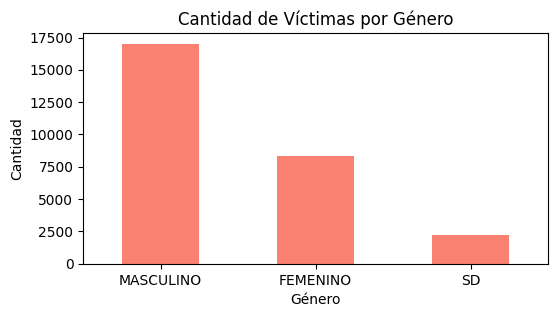

In [163]:
# Crea un gráfico de barras para contar la cantidad de víctimas por género
plt.figure(figsize=(6, 3))
sexo_counts = df_victima_lesiones['sexo'].value_counts()
sexo_counts.plot(kind='bar', color='salmon')
plt.title('Cantidad de Víctimas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

Se guarda el dataframe para trabajar en el dashboard

In [164]:
# Guarda el DataFrame en un archivo CSV
df_victima_lesiones.to_csv('lesiones_victima.csv', index=False)